## Analisando Dispersão dos dados do IBGE



### Medidas dispersão para a variável salário

Evidentemente o desvio pacrão e a variância fazem sentido para as variáveis quatitativas ou qualitativas ordinais numéricas com várias categorias. Para nosso exemplo temos idade, anos de estudo e salário.

### Acesso ao DataSet com a definição das listas com as idades e os salários 

In [1]:
# Separação da leitura do arquivo com dois TRYs diferentes para diferenciação em caso de erro

%time

import csv 
lista_com_salarios = []
lista_com_idades = list()

with open(r'data/data.csv', 'r') as data_csv:
    data = csv.reader(data_csv)

    for i, line in enumerate(data):
        if i>0:
            try:
                lista_com_idades.append(float(line[2]))
            except:
                pass
            
            try:
                lista_com_salarios.append(float(line[6]))
            except:
                pass

Wall time: 0 ns


In [2]:
len(lista_com_idades)

66470

In [3]:
len(lista_com_salarios)

47878

In [4]:
lista_com_idades[:5]

[53.0, 49.0, 22.0, 55.0, 56.0]

In [5]:
lista_com_salarios[:5]

[63600.0, 4352.400390625, 96600.0, 157800.0, 88550.0]

## Construção da função calcula_variancia_e_desvio (lista_valores)

Fazer a formula com base no código acima e na função abaixo:

$$ \sigma{_x}^{2} = \frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 }  $$


In [6]:
def calcula_variancia_e_desvio(lista_valores):
    '''
    Escrever o código para calcular a variância
    '''
    import math
    
    media = 0
    soma = 0
    
    
    for i in lista_valores:
        
        soma += i
        
    media = soma/len(lista_valores)
    
    print('media=', media)
    SQT = 0
    
    for n in lista_valores:
        SQT += (n-media)**2
    
    print('SQT=', SQT)
    
    variancia = SQT/len(lista_valores)
    desvio_padrao = math.sqrt(variancia)
    
    return (variancia, desvio_padrao)

### Aplicação da função para a lista com salarios

In [7]:
calcula_variancia_e_desvio(lista_com_salarios)

media= 19706.790323432902
SQT= 376066147518181.8


(7854675373.202344, 88626.60646330957)

### Aplicação da função para a lista com idades utilizando uma variável para os resultados

In [8]:
variavel_output = calcula_variancia_e_desvio(lista_com_idades)

media= 37.6348126974575
SQT= 8608267.4434146


In [9]:
variavel_output

(129.5060545120295, 11.380072693617976)

In [10]:
variavel_output[0]

129.5060545120295

In [11]:
variavel_output[1]

11.380072693617976

### Função alternativa com código otimizado em Python

In [12]:
def alternativa(lista):
    
    m = sum(lista) / len(lista)
    variancia = sum((xi - m) ** 2 for xi in lista) / len(lista)
    desvio_padrao = variancia**0.5
    
    return variancia, desvio_padrao

In [13]:
alternativa(lista_com_salarios)

(7854675373.202344, 88626.60646330957)

In [14]:
alternativa(lista_com_idades)

(129.5060545120295, 11.380072693617976)

# Plotando o histograma com matplotlib

In [15]:
import matplotlib.pyplot as plt

### Histograma da lista com salários

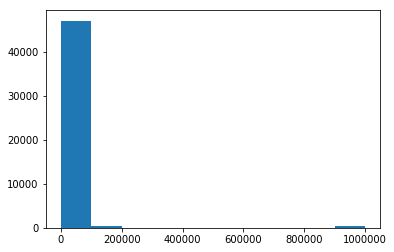

In [16]:
plt.hist(lista_com_salarios)
plt.show()

#### Escolhendo a quantidade de bins

Bins (ou cesta) é o parâmetro do módulo que plota histogramas que faz o agrupamento dos valores da lista em intervalos - para melhor visualização das frequências, é necessário otimizar o seu valor (ou parametrizar).

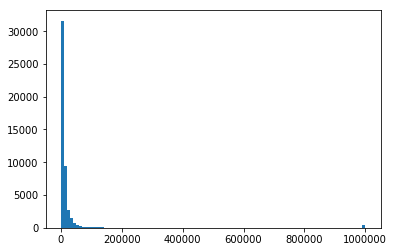

In [17]:
plt.hist(lista_com_salarios, bins=100)
plt.show()

#### Escolhendo o range de valores

O range é o parâmetro que define o intervalo do gistograma e também precisa de parametrização para melhor visualização da variação.

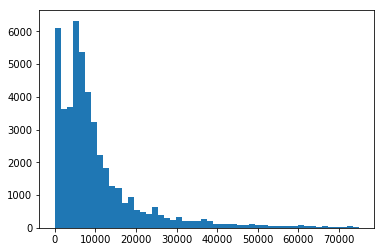

In [18]:
plt.hist(lista_com_salarios, bins=50, range=(-100, 75000))
plt.show()

## Histograma da lista com idades

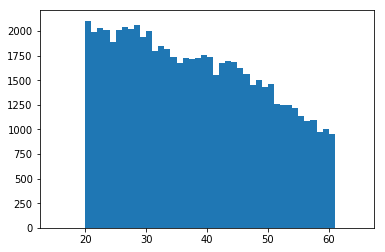

In [19]:
plt.hist(lista_com_idades, bins=50, range=(15,65))
plt.show()

## Fazendo a mesma análise para a variável anos de estudo

In [20]:
%time

import csv 
lista_anos_estudo = []

with open(r'data/data.csv', 'r') as data_csv:
    data = csv.reader(data_csv)

    for i, line in enumerate(data):
        if i>0:
            try:
                lista_anos_estudo.append(float(line[4]))
            except:
                pass

Wall time: 0 ns


In [21]:
calcula_variancia_e_desvio(lista_anos_estudo)

media= 8.686065176570356
SQT= 751966.8171758754


(11.38722541001689, 3.3744963194552295)

In [22]:
alternativa(lista_anos_estudo)

(11.38722541001689, 3.3744963194552295)

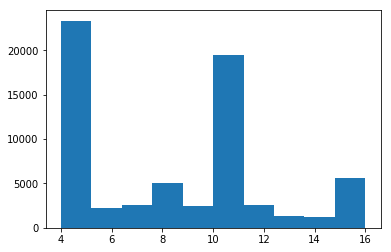

In [23]:
plt.hist(lista_anos_estudo,bins = 10, range=(4,16))
plt.show()

# Exemplo de três curvas com a mesma média e diferentes dispersões

In [24]:
lista_valores = []

for valor in range(0, 1000, 1):
    lista_valores.append((valor/125)-4)

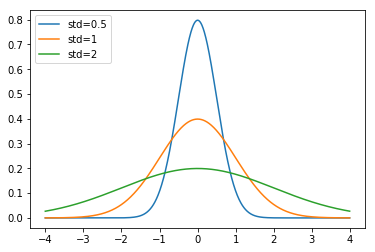

In [25]:
from scipy.stats import norm
import matplotlib.pyplot as plt

mean, std, std1, std2 = 0, 0.5, 1, 2

plt.plot(lista_valores, norm.pdf(lista_valores,mean,std), label='std=0.5')
plt.plot(lista_valores, norm.pdf(lista_valores,mean,std1), label='std=1')
plt.plot(lista_valores, norm.pdf(lista_valores,mean,std2), label='std=2')

plt.legend(loc='upper left')

plt.show()

## Medidas de Associação

# Exemplo com números gerados

Vamos criar duas variáveis aleatórias para utilização nesta parte de cálculo das medidas de associação através no numpy.random, e a partir do gráfico de dispersão (scatter plot) iremos trazer os códigos das funções de cálculo seguidas nos comandos da bilbioteca Scipy.Stats. 

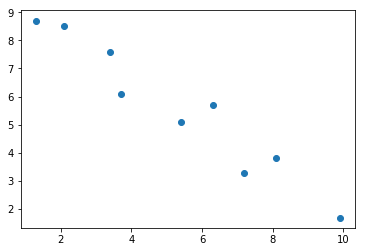

In [26]:
x1 = [1.3, 2.1, 3.4, 3.7, 5.4, 6.3, 7.2, 8.1, 9.9]
x2 = [8.7, 8.5, 7.6, 6.1, 5.1, 5.7, 3.3, 3.8, 1.7]

plt.scatter(x=x1,
            y=x2)

In [27]:
xy = list(zip(list(x1),list(x2)))
print(xy[:5])

[(1.3, 8.7), (2.1, 8.5), (3.4, 7.6), (3.7, 6.1), (5.4, 5.1)]


In [28]:
import scipy

metodo_nutella = scipy.stats.pearsonr(x1, x2)
print(metodo_nutella[0])

-0.9693785258717729


$$ \rho = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$

ou outras formas de representação:

<img src ='https://wikimedia.org/api/rest_v1/media/math/render/svg/9a883e9f9f3f8abd5a139141e1c60212d53a8f09' />

In [29]:
def corr_metodo_raiz(data):
    n = len(data)
    sumx = sum(i[0] for i in data)
    sumy = sum(i[1] for i in data)
    
    sumxSq=sum([i[0]**2.0 for i in data])
    sumySq=sum([i[1]**2.0 for i in data])
    
    pSum=sum([i[0]*i[1] for i in data])
    
    numerador=pSum-(sumx*sumy/n)
    denominador=((sumxSq-pow(sumx,2)/n)*(sumySq-pow(sumy,2)/n))**.5
    
    if denominador==0:
        r=0
    else:
        r=numerador/denominador
        
    return r

In [30]:
corr_metodo_raiz(xy)

-0.9693785258717726

## Analisando correlação nos dados do IBGE


In [31]:
import numpy

print(len(lista_com_idades), len(lista_com_salarios))
print('\n')
print(lista_com_idades[:5])
print(lista_com_salarios[:5])

66470 47878


[53.0, 49.0, 22.0, 55.0, 56.0]
[63600.0, 4352.400390625, 96600.0, 157800.0, 88550.0]


## Lendo e definindo uma lista de valores com idades e anos de estudo

In [32]:
idade_estudo = []

with open(r'data/data.csv', 'r') as data_csv:
    data = csv.reader(data_csv)
    for i, line in enumerate(data):
        observação = [] # cria uma lista em branco a cada iteração
        if i>0:
            try: # para evitar os campos nulos
                observação.append(float(line[2]))
                observação.append(float(line[4]))
                idade_estudo.append(observação)
            except:
                pass
            
len(idade_estudo)

66036

In [33]:
idade_estudo[:10]

[[53.0, 5.0],
 [49.0, 8.0],
 [22.0, 11.0],
 [55.0, 15.0],
 [56.0, 15.0],
 [30.0, 15.0],
 [52.0, 5.0],
 [29.0, 5.0],
 [29.0, 11.0],
 [46.0, 15.0]]

In [34]:
corr_metodo_raiz(idade_estudo)

-0.22316633803425154

In [35]:
lista_com_idades = []
lista_com_estudo = []

for row in idade_estudo:
    lista_com_idades.append(row[0])
    lista_com_estudo.append(row[1])    

In [36]:
len(lista_com_idades),len(lista_com_estudo)

(66036, 66036)

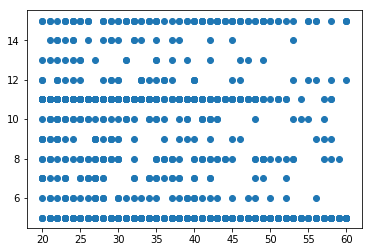

In [37]:
plt.scatter(x=lista_com_idades[:1000], y=lista_com_estudo[:1000])

### Correlation com Scipy.Stats

In [38]:
metodo_nutella = scipy.stats.pearsonr(lista_com_idades,lista_com_estudo)
print(metodo_nutella[0])

-0.22316633803425198


### Correlation with Numpy

In [39]:
import numpy as np

np.corrcoef(lista_com_idades, lista_com_estudo)

array([[ 1.        , -0.22316634],
       [-0.22316634,  1.        ]])

# Covariância

In [40]:
from numpy import cov

cov(lista_com_idades, lista_com_estudo)

array([[129.62205474,  -8.57393891],
       [ -8.57393891,  11.38739785]])

In [41]:
def cov_func(a, b):

    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    sum = 0

    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))

    return sum/(len(a)-1)

In [42]:
import numpy as np

cov_func(lista_com_idades, lista_com_estudo)

-8.573938913702294

In [43]:
import statistics
std_idades = statistics.stdev(lista_com_idades)
std_estudos = statistics.stdev(lista_com_estudo)

In [44]:
cov_func(lista_com_idades, lista_com_estudo)/(std_idades*std_estudos)

-0.22316633803425104

# Avançado

## Calculando a correlação de Spearman por Scipy.Stats

In [45]:
from scipy.stats import spearmanr
spearman = spearmanr(lista_com_idades, lista_com_estudo)
spearman[0]

-0.2420298536078769

## Calculando a correlação de Kendall por Scipy.Stats

In [46]:
from scipy.stats import kendalltau
tau = kendalltau(lista_com_idades, lista_com_estudo)
tau[0]

-0.17900231376164755